In [1]:
# explore random forest bootstrap sample size on performance
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from numpy import arange

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier


%matplotlib inline



In [2]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores



In [3]:
train = pd.read_csv('data/train.csv')  
test = pd.read_csv('data/test.csv')

#state_train = pd.get_dummies(train.user_state, prefix='state')
#train = pd.concat([train, state_train], axis=1)
train.drop(['user_state'], axis=1, inplace=True)

#state_test = pd.get_dummies(test.user_state, prefix='state')
#test = pd.concat([test, state_test], axis=1)
test.drop(['user_state'], axis=1, inplace=True)

In [4]:
X_train = train.drop('click', axis=1)
y_train = train['click']

X_test = test.drop('click', axis=1)
y_test = test['click']

In [5]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_test, y_test)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>0.1 0.921 (0.000)
>0.2 0.921 (0.000)
>0.3 0.920 (0.000)
>0.4 0.920 (0.000)
>0.5 0.920 (0.000)
>0.6 0.919 (0.000)
>0.7 0.919 (0.000)
>0.8 0.919 (0.000)
>0.9 0.919 (0.000)
>1.0 0.918 (0.000)


NameError: name 'pyplot' is not defined

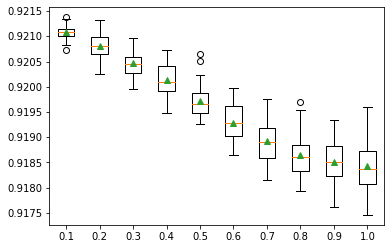

In [7]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()